# Contenido


* Cruzando datasets: operación JOIN
* Agregación de datos
* Tablas pivote
* Manejo de strings
* Manejo de tiempo

Este notebook se basa en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# 1.0 Cruzando datasets

* Cruzar datasets separados en varios Dataframes.
    * Para quienes sepan SQL: equivalente a la operación **JOIN**.
* Los Dataframes deben compartir datos en una columna.

In [ ]:
info = pd.DataFrame({'comuna_id': [1, 2, 3, 4],
                    'SuperficieKm2': [49924.1, 221.6, 22, 99],
                    'Poblacion': [21327, 227768, 237369, 289949]     })
comunas = pd.DataFrame({'Comuna': [ 'Concepción','Natales', 'Santiago', 'Las Condes'],
                    'comuna_id': [2, 1, 3, 4]})

In [ ]:
info.head()

,comuna_id,SuperficieKm2,Poblacion
0,1,49924.1,21327
1,2,221.6,227768
2,3,22.0,237369
3,4,99.0,289949


In [ ]:
comunas.head()

,Comuna,comuna_id
0,Concepción,2
1,Natales,1
2,Santiago,3
3,Las Condes,4


In [ ]:
display('info', 'comunas')

info
   comuna_id  SuperficieKm2  Poblacion
0          1        49924.1      21327
1          2          221.6     227768
2          3           22.0     237369
3          4           99.0     289949

comunas
       Comuna  comuna_id
0  Concepción          2
1     Natales          1
2    Santiago          3
3  Las Condes          4

* Ambos Dataframes comparte la columna **comuna_id**

In [ ]:
pd.merge(info, comunas, on = 'comuna_id') # on es el nombre de la columna común

,comuna_id,SuperficieKm2,Poblacion,Comuna
0,1,49924.1,21327,Natales
1,2,221.6,227768,Concepción
2,3,22.0,237369,Santiago
3,4,99.0,289949,Las Condes


In [ ]:
pd.merge(info, comunas, on = 'comuna_id').drop('comuna_id', axis='columns')

,SuperficieKm2,Poblacion,Comuna
0,49924.1,21327,Natales
1,221.6,227768,Concepción
2,22.0,237369,Santiago
3,99.0,289949,Las Condes


# Inner JOIN (intersección)

* Retorna filas cuyos valores están en ambos dataframes.


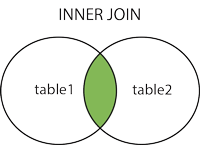

In [ ]:
df1 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'fav_food': ['fish', 'beans', 'bread']})
df2 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'fav_drink': ['wine', 'beer']})

In [ ]:
display('df1', 'df2', 'pd.merge(df1, df2, on="name", how="inner")')

df1
    name fav_food
0  Peter     fish
1   Paul    beans
2   Mary    bread

df2
     name fav_drink
0    Mary      wine
1  Joseph      beer

pd.merge(df1, df2, on="name", how="inner")
   name fav_food fav_drink
0  Mary    bread      wine

In [ ]:
set(df1.name) & set(df2.name) # intersección

{'Mary'}

## Left Join:
* Retornal filas que solo están en el dataframe de la izquierda.
    * Las filas que no contengan elementos en la derecha se completan con null (o NaN).


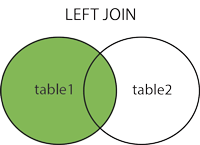

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='name', how='left')")

df1
    name fav_food
0  Peter     fish
1   Paul    beans
2   Mary    bread

df2
     name fav_drink
0    Mary      wine
1  Joseph      beer

pd.merge(df1, df2, on='name', how='left')
    name fav_food fav_drink
0  Peter     fish       NaN
1   Paul    beans       NaN
2   Mary    bread      wine

## Outer Join (unión):

* Retorna todas las filas con la unión de elementos de la izquierda y la derecha.
    * Los filas que no contienen elementos que calcen se completan con null.
    

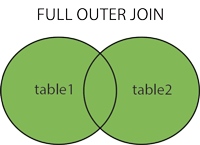

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='name', how='outer')")

df1
    name fav_food
0  Peter     fish
1   Paul    beans
2   Mary    bread

df2
     name fav_drink
0    Mary      wine
1  Joseph      beer

pd.merge(df1, df2, on='name', how='outer')
     name fav_food fav_drink
0   Peter     fish       NaN
1    Paul    beans       NaN
2    Mary    bread      wine
3  Joseph      NaN      beer

Ejercicio:
* ¿Cuántas personas aparecen en nuestros datasets?


In [ ]:
nombres=pd.merge(df1, df2, on='name', how='outer')['name']
nombres.shape

(4,)

* ¿Quiénes tienen comidas y bebidas favoritas?

In [ ]:
pd.merge(df1, df2, on='name', how='inner')['name']

0    Mary
Name: name, dtype: object

## Cardinalidad

* El dataframe de la derecha puede contener varias filas para un valor en la columna común.
* La operación merge devuelve tantas filas como el número de veces que aparece la clave en el dataframe de la derecha.

In [ ]:
department = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
skills = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [ ]:
display('department', 'skills', "pd.merge(department, skills, on='group', how='inner')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


# 2.0 Groupby

* Permite agrupar filas que comparten el mismo valor en una columna (o varias columnas!).
* Por cada grupo se puede realizar alguna operación de agregación.
* Ejemplo: sumar la columna **data** para las filas con el mismo valor en **key**
![Split-Apply-Combine](https://github.com/jakevdp/PythonDataScienceHandbook/raw/058289a6a8a544d2bc144ba0226d6ef27986e4e0/notebooks/figures/03.08-split-apply-combine.png)

In [ ]:
df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue', 'Andrew', 'Joan'],
                   'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'HR', 'HR'],
                   'salary':[1000, 5400, 4100, 3200, 4400 ,4900]})

* La función ``.groupby()`` separa las filas en grupos y calcula información agregada.
* Ejemplo: ¿Cuál es el sueldo promedio por departamento?

In [ ]:
display('df',"df.groupby('department').mean()")

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


df
     name   department  salary
0     Bob   Accounting    1000
1    Jake  Engineering    5400
2    Lisa  Engineering    4100
3     Sue           HR    3200
4  Andrew           HR    4400
5    Joan           HR    4900

df.groupby('department').mean()
                  salary
department              
Accounting   1000.000000
Engineering  4750.000000
HR           4166.666667

* También podríamos hacerlo así:

In [ ]:
for department, group in df.groupby('department'):
    print('Sueldo promedio de', department, 'es', group.salary.mean())

Sueldo promedio de Accounting es 1000.0
Sueldo promedio de Engineering es 4750.0
Sueldo promedio de HR es 4166.666666666667


Con el método `.agg( )` podemos ejecutar alguna función diseñada por nosotros. La función recibe como input la columna de las filas agregadas:

In [ ]:
def mi_funcion(serie):
    # recibe como parámetro una columna del dataframe
    return np.sum(serie)
df.groupby('department')['salary'].agg(mi_funcion)

department
Accounting      1000
Engineering     9500
HR             12500
Name: salary, dtype: int64

# 3.0 Pivot tables

* Las tablas pivotes permiten calcular resúmenes de los datos en un dataframe.
* La idea es calcular una agregación sobre datos que comparten el mismo valor en dos columnas distintas del dataframe.
    * Cada fila de la tabla pivote contiene los valores posibles en una columna de interés.
    * Cada columna de la tabla, los de otra columna.
* Las celdas de la tabla pivote contienen un valor agregado para las filas que tienen el mismo valor en ambas columnas.

In [ ]:
import seaborn as sns # Seaborn es un módulo para graficar datos
#Lo vamos a importar para leer el data frame que viene en la libreria
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Pregunta: ¿Cuál es el número de supervivientes por sexo y tipo de clase?

### Tengo dos caminos

Primer Camino

In [ ]:
titanic[titanic['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
titanic[titanic['survived']==1].groupby(['sex', 'class'])

In [ ]:
titanic[titanic['survived']==1].groupby(['sex', 'class']).size()

sex     class 
female  First     91
        Second    70
        Third     72
male    First     45
        Second    17
        Third     47
dtype: int64

In [ ]:
titanic[titanic['survived']==1].groupby(['sex', 'class']).size().unstack()

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Segundo Camino

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.sum)

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


¿Cuantos de los sobrevievientes son mujeres e iban en primera clase?

In [ ]:
titanic[((titanic['survived'] == 1) &
         (titanic['sex'] == 'female') &
         (titanic['class'] == 'First') )].shape[0]

91

¿Cuántos sobrevieron en total?

* Con el parámetro ``margins=True`` pueden obtener la suma de elementos en cada celda.

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.sum, margins=True)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [ ]:
(titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'First')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'Second')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'Third')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'First')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'Second')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'Third')].shape[0])

342

Pregunta: ¿Cuál es la tasa de supervivencia por sexo y tipo de clase?

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.mean)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Pregunta: ¿Cuál es el número de supervivientes por edad (mayor y menor de 18), sexo y tipo de clase?

In [ ]:
# dividimos la edad en dos grupos, mayores y menores de 18 (de 0 a 18 y de 18 a 100)
# pd.cut divide una serie en grupos
age = pd.cut(titanic['age'], [0, 18, 100], labels=['child','adult'])
age.head()

0    adult
1    adult
2    adult
3    adult
4    adult
Name: age, dtype: category
Categories (2, object): ['child' < 'adult']

In [ ]:
titanic.pivot_table('survived', index=['sex', age], columns='class', aggfunc=np.mean)

class            First    Second     Third
sex    age                                
female child  0.909091  1.000000  0.511628
       adult  0.972973  0.900000  0.423729
male   child  0.800000  0.600000  0.215686
       adult  0.375000  0.071429  0.133663

# 3.0 Extra

Para los ejemplos usaremos esta función que permite crear data frames artificiales. Serán útiles para explicar lo que sigue:

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## Concatenando Dataframes

Con el método `.concat()` podemos concatenar dos Dataframes:

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
df1.append([df2])

<ipython-input-76-cd6466d35ab3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append([df2])


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Algunos tips con GroupBy
Puedes utlizar una clave compuesta para dividir un dataset:

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.626626,1.379372
1,a,two,-1.346406,-0.769419
2,b,one,-0.677258,0.351321
3,b,two,2.290301,1.373172
4,a,one,-0.473244,1.075919


agg agrega usando una o más operaciones sobre columnas

In [ ]:
df.groupby(['key1','key2']).agg({'data1':np.sum, 'data2':np.mean})

data1     data2
key1 key2                    
a    one  -1.099870  1.227646
     two  -1.346406 -0.769419
b    one  -0.677258  0.351321
     two   2.290301  1.373172

# Actividad Evaluada

El archivo 2020-06-01-CasosConfirmados-totalRegional.csv contiene el número de casos confirmados de covid-19 por región del día 2020-06-01 y el archivo pcr.csv contiene el número de tests PCR realizado por región por día. Programe un código en Jupyter que devuelva un archivo nuevo llamado positividad.csv que contenga el número de tests PCR realizados, el número de tests positivos, la positividad (el número de casos positivos por número de tests realizados) para el día 2020-06-01 para cada región. Entregue el Jupyter Notebook con la solución.

In [ ]:
try:
    import google.colab
    !curl -L -o 2020-06-01-CasosConfirmados-totalRegional.csv 'https://www.dropbox.com/s/lr9a87l723lhrbj/2020-06-01-CasosConfirmados-totalRegional.csv?dl=1'
    !curl -L -o pcr.csv 'https://www.dropbox.com/s/vdjlqez551w3wp2/pcr.csv?dl=1'
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    90    0    90    0     0    167      0 --:--:-- --:--:-- --:--:--   167
100   320  100   320    0     0    278      0  0:00:01  0:00:01 --:--:--   278
100   698  100   698    0     0    429      0  0:00:01  0:00:01 --:--:--  1558
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    52    0    52    0     0    102      0 --:--:-- --:--:-- --:--:--   102
100   320  100   320    0     0    307      0  0:00:01  0:00:01 --:--:--   307
100  4061  100  4061    0     0   2811      0  0:00:01  0:00:01 --:--:--  2811


In [ ]:
casos=pd.read_csv('2020-06-01-CasosConfirmados-totalRegional.csv') #abrimos el archivo
pcr=pd.read_csv('pcr.csv')

In [ ]:
casos.head()

,Region,Casos totales acumulados,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Fallecidos,% Total
0,Arica y Parinacota,636,17,13,4,8,0.60%
1,Tarapaca,2526,165,152,13,22,2.40%
2,Antofagasta,2585,75,67,8,32,2.46%
3,Atacama,232,14,8,6,0,0.22%
4,Coquimbo,668,40,33,7,2,0.64%


In [ ]:
pcr.head()

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,157,76,160,159,81,172,90,243,137,0
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,347,335,365,586,314,360,470,565,472,445
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,344,224,347,218,165,206,343,501,379,247
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,133,99,83,175,261,178,155,83,126,289
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,221,227,210,214,138,222,176,248,359,177
